Natalia Brzozowska
# Laboratorium 7
## Dekompozycja spektralna

***
### 1. Metoda potegowa
**Napisz funkcję obliczajacą metodą potegową dominujacą wartość własną (najwiekszą co
do modułu) i odpowiadajacy jej wektor własny dla danej macierzy rzeczywistej symetrycznej.**
  * Powtarzaj mnozenie wektora $x_{i}$ przez macierz $A$:
       * $x_{i+1} = Ax_{i}$,
       * dzieląc za każdym razem wektor wynikowy przez $||x_{i+1}||_{inf}$
  * Element wektora $x_{i}$ o najwiekszej wartości bezwzglednej zbiega do dominującej wartości własnej
  * Przeskalowany wektor $x_{i}$ zbiega do dominującego wektora własnego
  * Obliczenia powinny sie zatrzymać po przekroczeniu maksymalnej liczby iteracji, albo w przypadku gdy $||x_{i} − x_{i+1}||$ < e (kryterium małej poprawki)
  * Pod koniec obliczeń znormalizuj otrzymany wektor własny.
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
def make_symmetric_matrix(n):
    rand_matrix = np.random.randint(1,100, size=(n,n))
    matrix=np.tril(rand_matrix) +np.triu(rand_matrix.T,1)
    return matrix

def power_method(matrix,n,eps):
    size=len(matrix)
    x=np.ones(size)
    k=1    
    while(k<=n):
        y=matrix@x
        u=max(abs(y))
        y=y/np.linalg.norm(y,np.inf)
        err=np.linalg.norm(x-y)        
        x=y
        if(err<eps):
            print("successful procedure")
            return u,x/np.linalg.norm(x)
                           
        k+=1
    print("maximum number of iterations exceeded")
    return u,x/np.linalg.norm(x)


def choose_eigen_form_numpy(x,u):
    m=[]
    i=0
    for i in range(len(x)):
        m.append(x[i][0])
        i+=1
    return u[0], np.array(m)
        

Funkcja *make_symmetric_matrix(n)* tworzy i zwraca macierz symetryczną o rozmiarze n.<br><br>
Funkcja *power_method(matrix,n,eps)* oblicza dominującą wartosć własną macierzy *matrix* i odpowiadajacy jej wektor własny. Parametr *n* oznacza maksymalną ilość iteracji - mnożenia wektora własnego *x* przez macierz *matrix*. Parametr *eps* oznacza maksymalną różnicę, między wektorem *x* z poprzedniej iteracji, a wektorem *y* z obecnej. Jeśli realna różnica *err* będzie mniejsza od *eps* program się zakończy (kryterium małej poprawki).<br>
Funkcja ta opiera się na zasadzie działanie metody potęgowej, czyli wielokrotnego mnożenia wektora własnego przez podaną macierz. Każdorazowo po pomnożeniu, wartość wektora zostaje podzielona przez normę "nieskończoność". Jeżeli różnica między kolejnymi wektorami będzie wystarczająco mała, algorytm zakończy działanie zwracając wektor własny *x* oraz wartość dominującą, którą w przybliżeniu jest element wektora *x* o największej wartości bezwzględnej.<br><br>
Funkcja *choose_eigen_form_numpy(x,u)* wybiera dominującą wartość własną macierzy z wektora otrzymanego z funkcji *np.linalg.eig(matrix)*, oraz odpowiadający jej wektor własny.

In [14]:
matrix=make_symmetric_matrix(10)
u,x = power_method(matrix,500000,1e-10)
print("eigenvalue", u,"\neigenvector",x)

successful procedure
eigenvalue 592.8872028588626 
eigenvector [0.25704401 0.2730898  0.34730967 0.36866733 0.28588939 0.27671432
 0.31330933 0.33864271 0.35533908 0.32465318]


***
**Sprawdz poprawnosc działania programu porównujac własna implementacje
z wynikami funkcji bibliotecznej.**

In [15]:
nu,nx=np.linalg.eig(matrix)
nnu,mnnx=choose_eigen_form_numpy(nx,nu)
print("eigenvalue", nnu,"\neigenvector ",mnnx)
nnx=abs(mnnx)
print("\neigenvalue", nnu,"\neigenvector (abs)",nnx)

eigenvalue 592.8872028564613 
eigenvector  [-0.25704401 -0.2730898  -0.34730967 -0.36866733 -0.28588939 -0.27671432
 -0.31330933 -0.33864271 -0.35533908 -0.32465318]

eigenvalue 592.8872028564613 
eigenvector (abs) [0.25704401 0.2730898  0.34730967 0.36866733 0.28588939 0.27671432
 0.31330933 0.33864271 0.35533908 0.32465318]


In [16]:
print("eigenvalues similar - ",np.allclose(u,nnu))
print("eigenvectors similar - ",np.allclose(x,nnx))

eigenvalues similar -  True
eigenvectors similar -  True


Można zauważyć, że wartości obliczone przez *np.linalg.eig(matrix)* oraz przez *power_method(m,n,e)* są zgodne co do wartości bezwzględnej. Możliwym jest, że dla niektórych macierzy, znak wartości nie będzie zgodny. Implementacja *power_method(m,n,e)* nie uwzględnia znaku. <br>
Zatem metoda potęgowa dobrze się sprawdza do obliczenia dominującej wartości własnej macierzy oraz odpowiadającego jej wektora (bez uwzględnienia znaku).

***
**Przedstaw na wykresie zależność czasu obliczeń od
rozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).**

In [6]:
def chceck_corectness(u,x,matrix):
    start=time.time()
    nu,nx=np.linalg.eig(matrix)
    end=time.time()
    nnu,mnnx=choose_eigen_form_numpy(nx,nu)
    nnx=abs(mnnx)
    if(np.allclose(u,nnu)==False):
        print("eigenvalues smilar - False")
    if(np.allclose(x,nnx)==False):
        print("eigenvectors similar - False")
    return end-start
    
def power_method_time():
    timearr=[]
    numpytime=[]
    size=[]
    for i in range(50, 1800, 50):
        size.append(i)
        matrix=make_symmetric_matrix(i)
        start=time.time()
        u,x = power_method(matrix,500000,1e-10)
        end=time.time()
        numpytime.append(chceck_corectness(u,x,matrix))
        timearr.append(end-start)
        
    plt.plot(size,timearr,'cd')
    plt.ylabel('time')
    plt.xlabel('size')
    plt.title('POWER_METHOD: Duration of power method depending on matrix size')
    plt.show()
    
    plt.plot(size,numpytime,'md')
    plt.ylabel('time')
    plt.xlabel('size')
    plt.title('NP.LINALG.EIG: Duration of power method depending on matrix size')
    plt.show()

Funkcja *chceck_corectness(u,x,matrix)* wykonuje obliczenie wartości własnych macierzy i wektorów własnych korzystając z funkcji *np.linalg.eig(matrix)*, mierzy czas trwania tej funkcji, sprawdza czy wyliczone wartości zgadzają się z przekazanymi *x* - wektorem, *u* - wartością. Zwraca czas działania funkcji.<br><br>
Funkcja *power_method_time()* tworzy macierz symetryczną, następnie mierzy czas działania funkcji *power_method(matrix,n,e)* i zapisuje w *timearr* oraz wykonuje funkcję *chceck_corectness(u,x,matrix)* i zapisuje wyniki tej funkcji w tabeli *numpytime*. <br>
Następnie funkcja wyświetla wykres czasu w zależności od rozmiaru dla funkcji *power_method_time()*, a potem dla funkcji *chceck_corectness(u,x,matrix)*.

successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure
successful procedure


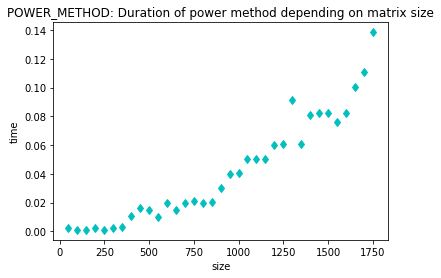

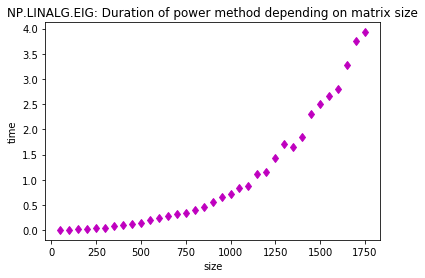

In [7]:
power_method_time()

Na obu wykresach widać, że wraz ze wzrostem rozmiaru macierzy, wzrasta czas działania funkcji. Jednak do rozmiary macierzy $250x250$ czas trwania funkcji *power_method(m,n,e)* jest bardzo niski i prawie się nie zmienia. Czas trwania zaimplementowanej wyżej funkcji, jest zdecydowanie niższy, niż czas trwania funkji bibliotecznej. Funkcja biblioteczna jednak wylicza wszytskie wektory i wartości własne oraz owzględnia znak. Kształty obu wykresów są bardzo podobne.

***
### 2. Odwrotna metoda potegowa
**Opierąjc sie na twierdzeniu o transformacji widma macierzy:**<br>
   * *Twierdzenie 1. Macierz $(A−sI)^{−1}$ (jeśli istnieje), to ma wartości własne równe $1/l_{k} − s$ ($l_{k}$ jest k-ta wartościa macierzy A) i wektory własne identyczne z macierzą A.*<br>
   
**oraz wykorzystując metode potegową i faktoryzację LU zaimplementuj odwrotną metodę
potegową pozwalajacą na szybkie znalezienie wektorów własnych macierzy A, dla wartości
s bliskich odpowiedniej wartości własnej. Wykorzystaj fakt, ze mnożenie wektora $x_{i}$
przez macierz $A^{−1} (x_{i+1} = A^{−1}x_{i})$ odpowiada rozwiazaniu układu równań $Ax_{i+1} = x_{i}$.**
***

In [8]:
import scipy.linalg

In [9]:
def inv_power_method(matrix,n,eps):
    values, vectors=np.linalg.eig(matrix)
    size=len(matrix)
    I=np.identity(size)
    r=[]
    sig=[]
    for i in range(len(vectors)):
        sigma = round(values[i],1)
        sig.append(sigma)
        x=np.ones(size)
        k=0
        P,L,U = scipy.linalg.lu(matrix-sigma*I)
        while(k<n):
            y=np.linalg.solve(P@L@U,x)
            y=(y/np.linalg.norm(y,np.inf))
            err=np.linalg.norm(x-y,np.inf)
            x=y
            if(err<eps):
                r.append(x/np.linalg.norm(x))
                break;
            k+=1
        if k==n:
            r.append(x/np.linalg.norm(x))
    r=np.array(r)
    return r.T, sig



def check_results(ri,nr):
    for i in range(len(ri)):
        print("eigenvectors similar - ",np.allclose(ri[i],nr[i]))

Funkcja *inv_power_method(matrix,n,eps)* jest implementacją odwrotnej metody potęgowej, która określa wartość sigma dla każdej wartości własnej macierzy zaokrąglając ją do pierwszego miejsca po przecinku, by nastęnie obliczyć wektor własny tejże macierzy. Dla każdej wartości sigma wykonywana jest dekompozycja LU macierzy $A-sI$ (s=sigma), następnie obliczane jest rozwiązanie równania  $Ax_{i+1} = x_{i}$, korzystając ze wcześniej wyznaczonych macierzy $PLU$. Kolejnym krokiem jest, podobnie jak w metodzie potęgowej, dzielenie wyniku równania przez normę w nieskończoności z tegoż wyniku. Dwa powyższe działania wykonywane są do momentu przekroczenia określonej ilości iteracji *n* lub gdy różnica między kolejnymi wyliczonymi wektorami będzie wystarczająco mała. Wtedy wektor wynikowy dodawany jest do tablicy i algorytm jest powtarzany dla kolejnej sigmy.<br>
Funkcja zwraca transponowaną macierz wektorów własnych, by móc prościej porównać ją z wynikami funkcji *np.linalg.eig(matrix)* oraz wartości sigmy.<br><br>
Funkcja *check_results(ri,nr)* sprawdza zgodność kolejnych wektorów otrzymanych z zaimplementowanej funkcji oraz funkcji bibliotecznej.

In [10]:
matrix = np.random.randint(100, size=(3,3))
result,sig=inv_power_method(matrix,5000,1e-20)
print("inv_power_method sigmas\n",sig,"\ninv_power_method eigenvectors \n",result)
nu,nx=np.linalg.eig(matrix)
print("\nnumpy eigenvelues\n",nu, "\nnumpy eigenvectors \n",nx)

inv_power_method sigmas
 [128.2, -43.4, 25.3] 
inv_power_method eigenvectors 
 [[ 0.72273359 -0.64232634 -0.18818189]
 [ 0.65550812  0.75073704 -0.74558652]
 [ 0.21900973  0.15430738  0.63928735]]

numpy eigenvelues
 [128.1723799  -43.44258189  25.27020199] 
numpy eigenvectors 
 [[-0.72273359 -0.64232634 -0.18818189]
 [-0.65550812  0.75073704 -0.74558652]
 [-0.21900973  0.15430738  0.63928735]]


In [11]:
check_results(abs(result),abs(nx))

eigenvectors similar -  True
eigenvectors similar -  True
eigenvectors similar -  True


Jak można zauważyć, wartości obliczonych wektorów są zgodne co do wartości bezwzględnej, w niektórych przypadkach znak wartości nie jest ten sam.